Load and Inspect Data:  
Utilize pandas to load the World Happiness Report Dataset.  
Examine the data to grasp its structure and contents of the year 2019.  

In [1]:
!kaggle datasets download -d unsdsn/world-happiness --unzip

Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0




  0%|          | 0.00/36.8k [00:00<?, ?B/s]
100%|██████████| 36.8k/36.8k [00:00<00:00, 154kB/s]
100%|██████████| 36.8k/36.8k [00:00<00:00, 154kB/s]


In [2]:
import pandas as pd


happiness_2019 = pd.read_csv('2019.csv')


happiness_2019.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Data Preprocessing:  

Address missing values and adjust data types as necessary.  

In [3]:
print(happiness_2019.isnull().sum())

happiness_2019_clean = happiness_2019.dropna()

print(happiness_2019_clean.dtypes)


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object


Social Support and Happiness:  

Employ a Matplotlib scatter plot to investigate the relationship between ‘Social support’ and ‘Score’.  

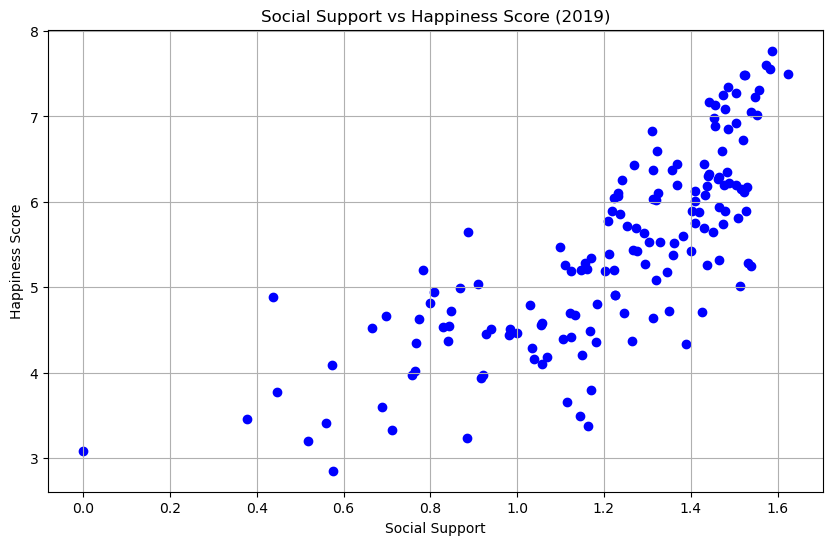

In [5]:
import matplotlib.pyplot as plt

# Scatter plot of Social Support vs Happiness Score
plt.figure(figsize=(10, 6))
plt.scatter(happiness_2019_clean['Social support'], happiness_2019_clean['Score'], color='blue')
plt.title('Social Support vs Happiness Score (2019)')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()


Regional Comparisons of GDP and Health:  

Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’ across different regions.  
Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’ on the same axes to observe how economic strength relates to health outcomes in different regions.  

In [6]:
happiness_2019_clean.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


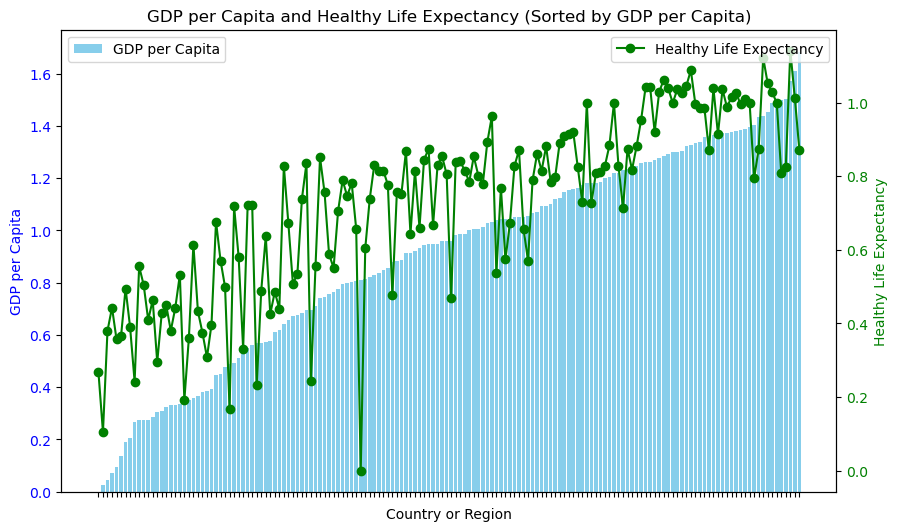

In [17]:
# Sort by GDP per Capita in ascending order
happiness_2019_clean = happiness_2019_clean.sort_values(by='GDP per capita', ascending=True)

# Create a bar chart for GDP per Capita and line plot for Healthy Life Expectancy
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for GDP per Capita
ax1.bar(happiness_2019_clean['Country or region'], happiness_2019_clean['GDP per capita'], color='skyblue', label='GDP per Capita')
ax1.set_xlabel('Country or Region')
ax1.set_ylabel('GDP per Capita', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax1.set_xticklabels([]) # They will all get mixed up into a mess anyway and nothing will be visible.


# Line plot for Healthy Life Expectancy on the same axis
ax2 = ax1.twinx()
ax2.plot(happiness_2019_clean['Country or region'], happiness_2019_clean['Healthy life expectancy'], color='green', marker='o', label='Healthy Life Expectancy')
ax2.set_ylabel('Healthy Life Expectancy', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Titles and legends
plt.title('GDP per Capita and Healthy Life Expectancy (Sorted by GDP per Capita)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()